   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean

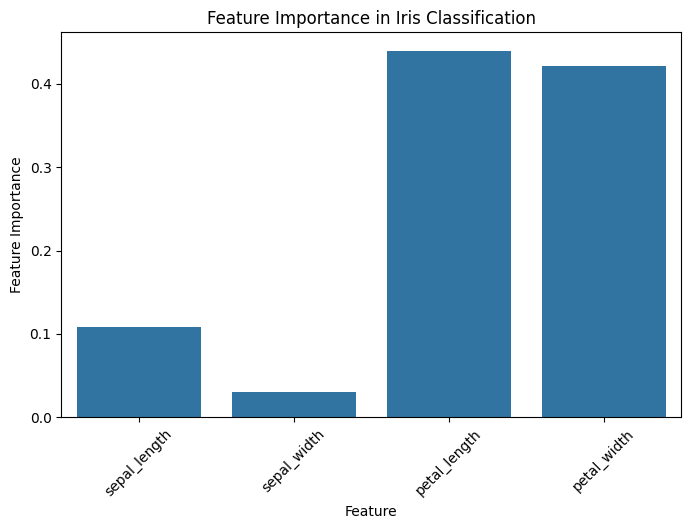

Accuracy: 1.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



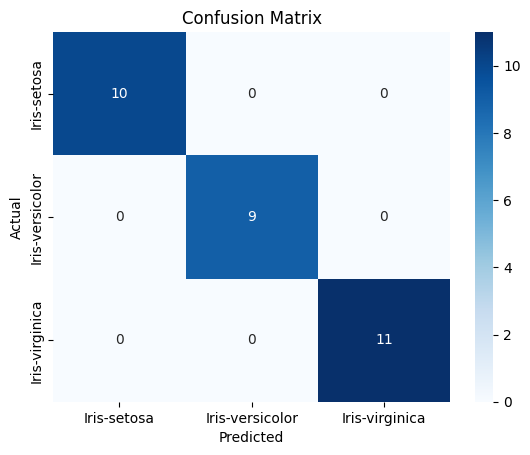

Predicted species: Iris-setosa


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Load the dataset from the uploaded file
dataset_path = "IRIS.csv"
df = pd.read_csv(dataset_path)

# Step 2: Data exploration
print(df.head())
print(df.info())
print(df.describe())

# Step 3: Data preprocessing
X = df.drop(columns=["species"])
y = df["species"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 4: Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 5: Feature Importance Analysis
feature_importances = model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(8, 5))
sns.barplot(y=feature_importances, x=feature_names)
plt.ylabel("Feature Importance")
plt.xlabel("Feature")
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.title("Feature Importance in Iris Classification")
plt.show()

# Step 6: Evaluate the model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Step 7: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=df["species"].unique(), yticklabels=df["species"].unique())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Step 8: Save the model
joblib.dump(model, "iris_model.pkl")

# Step 9: Load and test the model with new data
loaded_model = joblib.load("iris_model.pkl")
sample_data = np.array([[5.1, 3.5, 1.4, 0.2]])  # Example input
scaled_sample = scaler.transform(sample_data)
prediction = loaded_model.predict(scaled_sample)
print("Predicted species:", prediction[0])
